# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Вам нужно научиться определять рыночную стоимость объектов недвижимости. Для этого проведите исследовательский анализ данных и установите параметры, влияющие на цену объектов. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность.

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта и других объектов — эти данные автоматически получены из геосервисов. Количество парков и водоёмов также заполняется без участия пользователя.

## Изучение общей информации

In [1]:
import pandas as pd 
import numpy as np

In [2]:
try:
    df = pd.read_csv('C:/Users/iamst/Documents/real_estate_data.csv', sep='\t')
except:
    df = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

Отобразим несколько верхних строк, чтобы удотовериться, что разделитель был выбран корректно и ознакомиться с данными.

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
df.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,False,False,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,False,False,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,False,False,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,False,False,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,False,False,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


Просмотрим общую информацию о датафрейме и гистограммы, чтобы составить более детальное представление о данных и распределении.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Столбец `'is_apartment'` содержит значения True/False/null и относится к типу object.  
Столбец `'first_day_exposition'` содержит данные о дате и времени, но время в даннных не указано.  
Столбцы  `'parks_around3000','ponds_around_3000', 'balcony', 'floors_total', 'days_exposition'` содержат значения исчисляемые целыми числами.  
Столбцы `'parks_nearest', 'ponds_nearest', 'airports_nearest', 'city_centers_nearest'` содержат информацию о расстоянии в метрах, но данные относятся к типу float64. Столбец `'last_price'` содержит информацию о цене в рублях, так же относится к float64. 

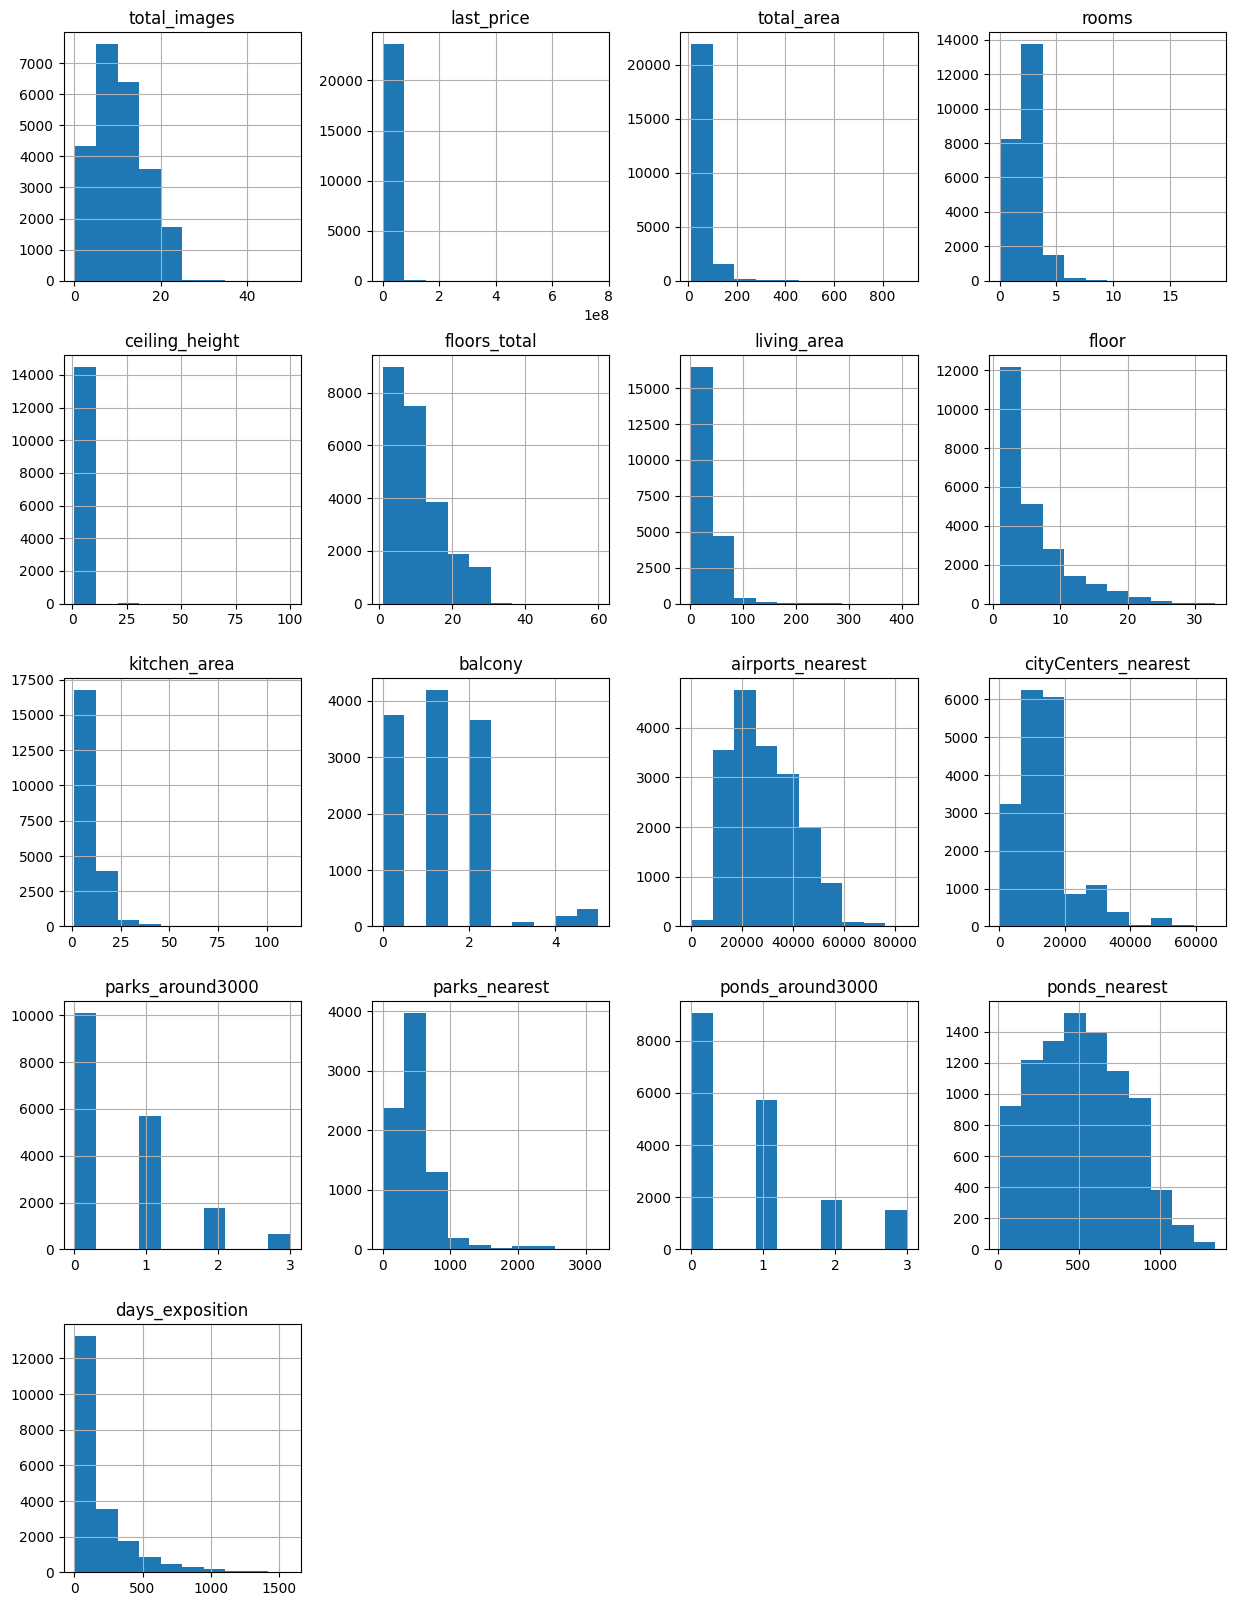

In [6]:
df.hist(figsize=(15, 20));

На гистограммах мы можем наблюдать:  
- `'last_price'` показывает что есть как минимум 1 выделяющееся наблюдение по цене
- `'ceiling_height'` несколько отличных от общей массы значений как в большую так и в меньшую сторону
- колличество корзин неподходит для корректного ображения данных `'balcony'`

### Вывод 1

Большинство столбцов датафрейма имеет численный тип (float64, int64).  
Присуствует 1 столбец с булевыми значениями(bool), но содержащий null значений.  
Стоит обратить внимание на текстовые столбцы object, возможно они были заполнены вручную.  
Для нескольких столбцов тип float64 следует изменить на int64,  тк представленный тип данных избыточен для содержащихся значений, например часы и копейки не представлены в наблюдениях и не существенны.  
В нескольких столбцах могут быть артефакты, это стоит дополнительно проверить.

## Предобработка данных

### Проверка наименований и дубликатов

Проверим датафрейм на наличие дубликатов.

In [7]:
df.duplicated().sum() 

0

Дубликаты не ображуены, можно дальше обрабатывать данные.  
Проверим соответсвие названий столбцов "змеиному регистру" и переименуем несоответсующие.

In [8]:
df.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'cityCenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

In [9]:
df = df.rename(
    columns={
        'cityCenters_nearest':'city_centers_nearest',
        'parks_around3000':'parks_around_3000',
        'ponds_around3000':'ponds_around_3000',
    }
)

### Обработка пропусков и аномалий

Проверим, что столбцы переименовались и одновременно посмотрим есть ли пропуски.

In [10]:
df.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
city_centers_nearest     5519
parks_around_3000        5518
parks_nearest           15620
ponds_around_3000        5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Рассмотрим значения в стобцах и решим как именно стоит обрабатывать данные.

#### Столбец ceiling_height

Пропуски составляют 38% от выборки - удалять их нецелесообразно.

In [11]:
display(df['ceiling_height'].isna().mean())

0.38799105447487237

В столбце явно есть выбросы, это видно из средней и медианы. 

In [12]:
df['ceiling_height'].describe()

count    14504.000000
mean         2.771499
std          1.261056
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

С практической точки зрения потолки выше 5 метров или ниже 2 метров - редкость.  
Рассмотрим более подробно гистограмму для высоких потолков.   
На графике видны выбросы в зоне 100 м и более 20 метров.  

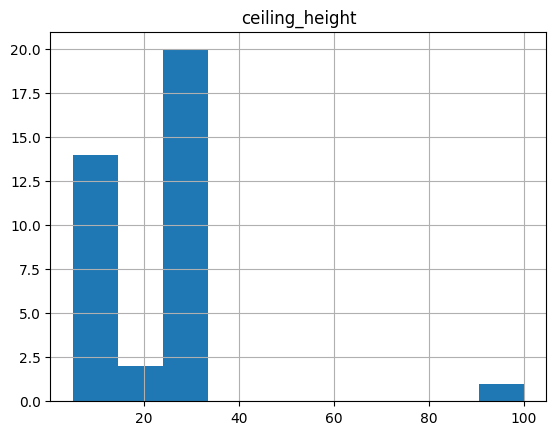

In [13]:
df.hist('ceiling_height',range=(5,100));

In [14]:
df.query('ceiling_height>5').groupby('ceiling_height')['ceiling_height'].count()

ceiling_height
5.2      1
5.3      2
5.5      1
5.6      1
5.8      1
6.0      1
8.0      3
8.3      1
10.3     1
14.0     1
20.0     1
22.6     1
24.0     1
25.0     7
26.0     1
27.0     8
27.5     1
32.0     2
100.0    1
Name: ceiling_height, dtype: int64

По ошибке возможно указать высоту потолка 22.0 вместо 2.2, 14 метров тоже выглядит неправдоподобно. Заменим подобные значения в данных.  
Потолки от 6 метров конечно же редкость, но наличие нескольких таких объектов возможно.
Заменять такие значения не видим необходимости.

In [15]:
df['ceiling_height']=df['ceiling_height'].where(df['ceiling_height'] < 20, df['ceiling_height']/10)
df['ceiling_height']=df['ceiling_height'].where(df['ceiling_height'] != 14, 2.65 )
df.query('ceiling_height>5').groupby('ceiling_height')['ceiling_height'].count()

ceiling_height
5.2     1
5.3     2
5.5     1
5.6     1
5.8     1
6.0     1
8.0     3
8.3     1
10.0    1
10.3    1
Name: ceiling_height, dtype: int64

Рассмотрим более подробно гистограмму для невысоких потолков. Очевидно, что потолков ниже  2 метров очень мало, наблюдаются 2 провала.
Наличие в выборке нескольких объектов с низкими потолками возможно, но ниже 2 метров уже похоже на выброс в данных.

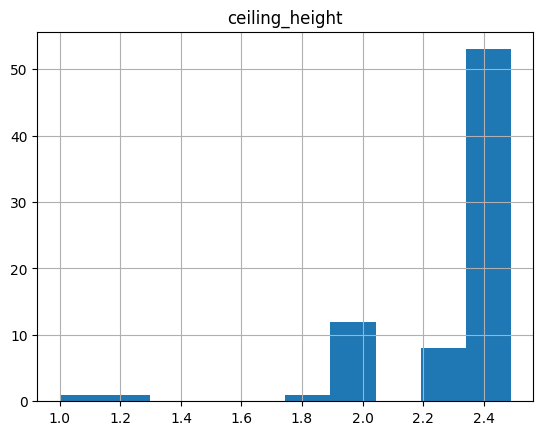

In [16]:
df.query('ceiling_height < 2.5').hist('ceiling_height');

In [17]:
df.query('ceiling_height <= 2').groupby('ceiling_height')['ceiling_height'].count()

ceiling_height
1.00     1
1.20     1
1.75     1
2.00    12
Name: ceiling_height, dtype: int64

Заменим эти данные медианным значением и проверим.

In [18]:
df['ceiling_height']=df['ceiling_height'].where(df['ceiling_height'] >2, df['ceiling_height'].median())

In [19]:
df.query('ceiling_height <= 2').groupby('ceiling_height')['ceiling_height'].count()

Series([], Name: ceiling_height, dtype: int64)

Удостоверимся, что в данных больше нет пропусков.

In [20]:
display(df['ceiling_height'].isna().sum())

0

#### Столбец floors_total

Общее колличество этажей может иметь значение в том случае, если квартира находится на первом или единственном этаже или на последнем.  
Вероятно владельцы не предали этому большого значения или не указали эти данные по невнимательности.  
Пропуски в столбце составляют крайне малую часть, не будем от них отказываться заменим на медианное значение.  

In [21]:
display(df['floors_total'].isna().agg({'mean','sum'}))
df['floors_total']=df['floors_total'].fillna(df['floors_total'].median())

sum     86.000000
mean     0.003629
Name: floors_total, dtype: float64

Проверим остались ли пропуски.

In [22]:
df['floors_total'].isna().sum()

0

####  Столбцы living_area и kitchen_area

От данных в этих столбцах наверняка зависит стоимость квартиры, поэтому избавиться от строк с Nan мы не можем.  
Можно предположить, что поля не заполнил владелец ненамеренно или из-за неуверенности в правильности рассчета.

In [23]:
display(df['living_area'].isna().agg({'mean','sum'}))
df['kitchen_area'].isna().agg({'mean','sum'})

sum     1903.000000
mean       0.080299
Name: living_area, dtype: float64

sum     2278.000000
mean       0.096122
Name: kitchen_area, dtype: float64

Добавим категории для более точного заполнения данных медианными значениями.  
Корреляция для столбца 'living_area' очень сильная и такому разделению можно доверять больше, чем просто медианному значению.  
Для столбца 'kitchen_area' корреляци меньше, но всё же тоже есть и медианное по категориям будет лучше отображать усреднённые данные, чем просто медианное значение.

In [24]:
display(df['living_area'].corr(df['total_area']))
df['kitchen_area'].corr(df['total_area'])

0.9395373338721493

0.6091211711198316

In [25]:
df['gr_total_area']=pd.cut(df['total_area'],[10,25,30,40,50,70,90,120,150,300,1000])

In [26]:
pd.pivot_table(df,index='gr_total_area',values=['total_area','living_area','kitchen_area'],aggfunc='median')

,kitchen_area,living_area,total_area
gr_total_area,,,
"(10, 25]",5.00,15.945,23.5
"(25, 30]",6.00,16.600,29.0
"(30, 40]",8.50,17.400,35.0
"(40, 50]",7.90,27.000,44.8
"(50, 70]",9.00,34.600,59.0
"(70, 90]",11.00,47.000,78.0
"(90, 120]",14.40,59.000,100.0
"(120, 150]",17.06,78.000,132.0
"(150, 300]",21.00,109.000,180.0


In [27]:
for t in df['gr_total_area'].unique():
    df.loc[(df['gr_total_area'] == t) & (df['living_area'].isna()), 'living_area'] = \
    df.loc[(df['gr_total_area'] == t), 'living_area'].median()

In [28]:
for t in df['gr_total_area'].unique():
    df.loc[(df['gr_total_area'] == t) & (df['kitchen_area'].isna()), 'kitchen_area'] = \
    df.loc[(df['gr_total_area'] == t), 'kitchen_area'].median()

Проверим результат наших действий.

In [29]:
display(df['kitchen_area'].isna().agg({'mean','sum'}))
df['living_area'].isna().agg({'mean','sum'})

sum     0.0
mean    0.0
Name: kitchen_area, dtype: float64

sum     0.0
mean    0.0
Name: living_area, dtype: float64

#### Столбец is_apartment

Столбец 'is_apartment' сожержит много пропусков. 
Владельцы апартаментов наверняка знают о такой характеристеке собственности, поскольку она сильно влияет на стоимость и юридическую сторону сделки.
Предположить, что они намеренно не указали этот пункт было бы ошибочно.
Поскольку это булев тип и возможны только два значения, заполним пропуски значением 'False' и проверим колонку.

In [30]:
display(df['is_apartment'].isna().sum())
df.groupby('is_apartment')['is_apartment'].count()

20924

is_apartment
False    2725
True       50
Name: is_apartment, dtype: int64

In [31]:
df['is_apartment']=df['is_apartment'].fillna(False)
df['is_apartment'].isna().sum()

0

#### Столбец balcony

В столбце содержрится информация о колличестве балконов в квартире. Вполне вероятно, что данные не были заполнены только потому, что система позволяла это сделать. Если запрос был постален "укажите колличества балконов в квартире", то многие владельцы могли не указать 0 из-за недопонимания, поэтому заполним пропуски на 0 значения.

In [32]:
display(df['balcony'].isna().sum())

11519

In [33]:
df.groupby('balcony')['balcony'].count()

balcony
0.0    3758
1.0    4195
2.0    3659
3.0      81
4.0     183
5.0     304
Name: balcony, dtype: int64

In [34]:
df['balcony']=df['balcony'].fillna(0)
df['balcony'].isna().sum()

0

#### Столбец days_exposition

В данном столбце присуствуют пропуски, означающие, что квартира еще не продана. Замена значений не требуется, но изменим тип данных на более подходящий для целочисленных значений.

In [35]:
display(df['days_exposition'].isna().sum())

3181

In [36]:
df['days_exposition'] = np.floor(pd.to_numeric(df['days_exposition'], errors='coerce')).astype('Int64')
df['days_exposition'].head()

0    <NA>
1      81
2     558
3     424
4     121
Name: days_exposition, dtype: Int64

#### Столбец locality_name

Пропусков в столбце locality_name немного, но их заменить ничем не возможно. 
Вероятнее всего пропуски объясняются тем, что либо было некорректно заполнено поле либо пользователю был предоставлен выбор из списка, в котором не оказалось нужного значения.  
Не представляется возможным заполнить эти пропуски каким-либо значениями. Поскольку таковых наблюдений меньше 1 процента - исключим эти строки из данных.

In [37]:
display(df['locality_name'].isna().mean())
df['locality_name'].isna().sum()

0.002067597788936242

49

In [38]:
df = df.dropna(subset=['locality_name']) 

In [39]:
df['locality_name'].isna().sum()

0

Столбец содержит наименования населённых пунктов, стоит учесть, что вполне вероятны неявные дубликаты.

In [40]:
df['locality_name'].nunique()

364

Проверим если ли дубликаты из-за разницы регистра в наименовании, заменим типичные расхождения Е и Ё, устраним в наименования дубликаты типов населённых пунктов.

In [41]:
df['locality_name'].str.lower().nunique()

364

In [42]:
df['locality_name'] =(
df['locality_name']
    .str.replace('ё', 'е')
    .replace(['поселок городского типа', 'городской поселок'], 'поселок', regex=True)
) 

Просмотрим получившиеся значения и проверим есть ли еще возможные неявные повторы.

In [43]:
df['locality_name'].sort_values().unique()

array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Никольское',
       'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалево',
       'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург',
       'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор',
       'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург',
       'деревня Агалатово', 'деревня Аро', 'деревня Батово',
       'деревня Бегуницы', 'деревня Белогорка', 'деревня Большая Вруда',
       'деревня Большая Пустомержа', 'деревня Большие Колпаны',
       'деревня Большое Рейзино', 'деревня Большой Сабск', 'деревня Бор',
       'деревня Борисова Грива', 'деревня Ваганово', 'деревня Вартемяги',
       'деревня Вахнова Кара', 'деревня Выскатка

Неявные дубликаты исключены, проверим изменилось ли количество уникальных значений.

In [44]:
df['locality_name'].nunique()

322

#### Столбцы с картографическими данными

Все столбцы содержащие данные заполненные данными из геосервисов не имеет смысла заполнять какими-либо значениями.  
В данном случае значения Nan представляют собой информацию о том, что не известно или не возможно определить.

In [45]:
geo_data_col=['airports_nearest', 'city_centers_nearest','parks_around_3000','ponds_around_3000', 'parks_nearest', 'ponds_nearest']
df[geo_data_col].isna().sum()

airports_nearest         5534
city_centers_nearest     5511
parks_around_3000        5510
ponds_around_3000        5510
parks_nearest           15586
ponds_nearest           14565
dtype: int64

In [46]:
df[geo_data_col].head(10)

,airports_nearest,city_centers_nearest,parks_around_3000,ponds_around_3000,parks_nearest,ponds_nearest
0,18863.0,16028.0,1.0,2.0,482.0,755.0
1,12817.0,18603.0,0.0,0.0,NaN,NaN
2,21741.0,13933.0,1.0,2.0,90.0,574.0
3,28098.0,6800.0,2.0,3.0,84.0,234.0
4,31856.0,8098.0,2.0,1.0,112.0,48.0
5,NaN,NaN,NaN,NaN,NaN,NaN
6,52996.0,19143.0,0.0,0.0,NaN,NaN
7,23982.0,11634.0,0.0,0.0,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN
9,50898.0,15008.0,0.0,0.0,NaN,NaN


### Преобразование типов данных

Благодаря исключению Nan значений 'is_apartment' относится к типу bool.
После проведенной обработки данных возможно перевести в тип int: 'last_price', 'balcony', 'floors_total'.

Столбец 'last_price' содержит информацию о стоимости квартиры в рублях, поэтому считаем, что сохранять типа данных float для отображения копеек не существенно, квартиры обычно продаются за миллионы и детятки тысяч. Остальным из перечисленных выше столбцов содержат информацию о явлениях исчисляемых штучно, сложно предположить полтора балкона или 8,5 этажей в типовом квартирном доме.

Поскольку столбцы содержат Nan значения, они оставлены в типе float64: 'parks_around3000','ponds_around_3000', 'parks_nearest', 'ponds_nearest', 'airports_nearest', 'city_centers_nearest'. Мы приняли решение максимально сохранять наблюдения, тк в других столбцах содержится существенная информация.

In [47]:
df=df.astype({'last_price': 'int', 'floors_total':'int','balcony':'int'})

Для столбеца 'first_day_exposition' можно обросить часы и минуты, тк эти данные отсуствуют.

In [48]:
df['first_day_exposition']=pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%d')
df['first_day_exposition'].head()

0   2019-03-07
1   2018-12-04
2   2015-08-20
3   2015-07-24
4   2018-06-19
Name: first_day_exposition, dtype: datetime64[ns]

Снова просмотрим информацию о данных, чтобы понимать как они изменились.

In [49]:
df.duplicated().sum()

0

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23650 entries, 0 to 23698
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23650 non-null  int64         
 1   last_price            23650 non-null  int32         
 2   total_area            23650 non-null  float64       
 3   first_day_exposition  23650 non-null  datetime64[ns]
 4   rooms                 23650 non-null  int64         
 5   ceiling_height        23650 non-null  float64       
 6   floors_total          23650 non-null  int32         
 7   living_area           23650 non-null  float64       
 8   floor                 23650 non-null  int64         
 9   is_apartment          23650 non-null  bool          
 10  studio                23650 non-null  bool          
 11  open_plan             23650 non-null  bool          
 12  kitchen_area          23650 non-null  float64       
 13  balcony         

### Вывод 2

Мы определили, в каких столбцах есть пропуски и заполнили их, где было возможно. А так же преобразовали типы данных в нескольких столбцах, где это было целесообразно и допустимо. Были изучены  уникальные значения в столбце с наименованием населённого пункта и устранены неявные дубликаты. 

На наш взгляд наиболее значимыми для анализа будут являться данные о физических характеристиках квартир. В соответствующих столбцах нет пропусков:  характеристики (1-13) и населённый пункт (14).  

Мы приняли решение максимально сохранять данные, чтобы из-за пропусков в менее значимых полях не потерять большое колличество данных, поэтому у нас сохранились пропуски в столбцах с геоданными и в столбце с колличеством дней с высталения объявления. Геоданные так же будут полезны как дополнительные характеристики, можно проверить гипотизу о их влиянии на стоиимость квартиры.  

Можно считать, что предобработка данных завершена, благодаря этому последующий анализ будет более точным.


## Добавление новых параметров

Создадим новые столбцы со новыми параметрами.
- цена одного квадратного метра;
- день недели публикации объявления (0 — понедельник, 1 — вторник);
- месяц публикации объявления;
- год публикации объявления;
- расстояние до центра города в километрах (переведите из м в км и округлите до ближайших целых значений);
- тип этажа квартиры (значения — «‎первый», «последний», «другой»).

Цена одного квадратного метра

In [51]:
df['m_price'] = (df['last_price']/ df['total_area']).round(2)
df['m_price'].head()

0    120370.37
1     82920.79
2     92785.71
3    408176.10
4    100000.00
Name: m_price, dtype: float64

День недели публикации объявления (0 — понедельник)

In [52]:
df['weekday'] = df['first_day_exposition'].dt.weekday
df[['weekday','first_day_exposition']].head()

,weekday,first_day_exposition
0,3,2019-03-07
1,1,2018-12-04
2,3,2015-08-20
3,4,2015-07-24
4,1,2018-06-19


Месяц и год публикации объявления

In [53]:
df['month'] = df['first_day_exposition'].dt.month
df['year'] = df['first_day_exposition'].dt.year
df[['first_day_exposition','month','year']].head()

,first_day_exposition,month,year
0,2019-03-07,3,2019
1,2018-12-04,12,2018
2,2015-08-20,8,2015
3,2015-07-24,7,2015
4,2018-06-19,6,2018


Расстояние до центра города в километрах

In [54]:
df['city_centers_nearest'].head()

0    16028.0
1    18603.0
2    13933.0
3     6800.0
4     8098.0
Name: city_centers_nearest, dtype: float64

In [55]:
df['city_center_km']= (df['city_centers_nearest']/1000).round(0)

In [56]:
df['city_center_km'] = np.floor(pd.to_numeric(df['city_center_km'], errors='coerce')).astype('Int64')
df['city_centers_nearest'] = np.floor(pd.to_numeric(df['city_centers_nearest'], errors='coerce')).astype('Int64')
df['city_center_km'].head()

0    16
1    19
2    14
3     7
4     8
Name: city_center_km, dtype: Int64

Тип этажа квартиры со значениями:  «‎первый», «последний», «другой»

In [57]:
df['floor_type']=df['floor']
df['floor_type'].head()

0     8
1     1
2     4
3     9
4    13
Name: floor_type, dtype: int64

In [58]:
df['floor_type']=df['floor_type'].where(df['floor_type']!=1, 'первый')

In [59]:
df['floor_type']=df['floor_type'].where(df['floor_type']!=df['floors_total'], 'последний') 

In [60]:
df['floor_type']=df['floor_type'].where((df['floor_type'] == 'последний') | (df['floor_type'] == 'первый'),'другой')

In [61]:
display(df['floor_type'].unique())
df['floor_type'].head()

array(['другой', 'первый', 'последний'], dtype=object)

0    другой
1    первый
2    другой
3    другой
4    другой
Name: floor_type, dtype: object

### Вывод 3

Мы добавили столбцы которые помогут нам в исследовательском анализе. 

In [62]:
df [[ 'm_price', 'weekday', 'month', 'year', 'city_center_km', 'floor_type' ]].head(10)

,m_price,weekday,month,year,city_center_km,floor_type
0,120370.37,3,3,2019,16,другой
1,82920.79,1,12,2018,19,первый
2,92785.71,3,8,2015,14,другой
3,408176.10,4,7,2015,7,другой
4,100000.00,1,6,2018,8,другой
5,95065.79,0,9,2018,<NA>,другой
6,99195.71,3,11,2017,19,другой
7,110544.69,3,4,2019,12,другой
8,87454.76,2,5,2018,<NA>,другой
9,88524.59,6,2,2017,15,другой


## Исследовательский анализ данных

### Гистограммы и наблюдения

Список параметров:
- общая площадь;
- жилая площадь;
- площадь кухни;
- цена объекта;
- количество комнат;
- высота потолкв;
- тип этажа квартиры («первый», «последний», «друго-»);
- общее количество этажей в доме;
- расстояние до центра города вметрах;
- расстояние до ближайшего парка.  


1. На гистограмме для 'total_area' видно, что подавляющее большинство квартир имеет площадь меньше 100 метров.  
Квартиры более 200 метров уже исчисляются в сотнях и меньше. Существенных выбросов нет.
За крайние значения разброса взяты максимальное(900) и минимальное(12) значения по колонке.  

<AxesSubplot:ylabel='Frequency'>

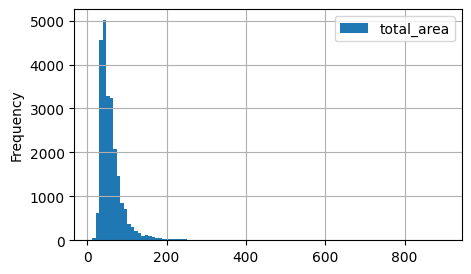

In [63]:
df.plot(y = 'total_area', kind = 'hist', bins = 100, grid=True, figsize = (5,3), range = (12,900))

<AxesSubplot:>

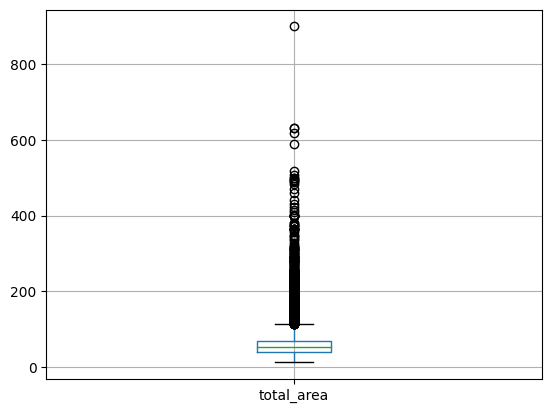

In [64]:
df.boxplot('total_area')

Однако на диаграмме ящик с усами есть несколько значений которые явно выбиваются - более 600 м. Четыре значения явно не составляют более чем 10% из выборки, удалим эти значения.

In [65]:
df.query('total_area>=600')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,gr_total_area,m_price,weekday,month,year,city_center_km,floor_type
3117,19,140000000,631.0,2019-03-30,7,2.65,5,219.0,5,False,False,False,60.0,0,Санкт-Петербург,25707.0,4972,0.0,NaN,2.0,210.0,<NA>,"(300, 1000]",221870.05,5,3,2019,5,последний
12859,20,140000000,631.2,2019-04-09,7,3.90,4,322.3,4,False,False,False,19.5,1,Санкт-Петербург,25707.0,4972,0.0,NaN,2.0,210.0,<NA>,"(300, 1000]",221799.75,1,4,2019,5,последний
15651,20,300000000,618.0,2017-12-18,7,3.40,7,258.0,5,False,False,False,70.0,0,Санкт-Петербург,32440.0,5297,0.0,NaN,2.0,198.0,111,"(300, 1000]",485436.89,0,12,2017,5,другой
19540,8,420000000,900.0,2017-12-06,12,2.80,25,409.7,25,False,False,False,112.0,0,Санкт-Петербург,30706.0,7877,0.0,NaN,2.0,318.0,106,"(300, 1000]",466666.67,2,12,2017,8,последний


In [66]:
df=df.query('total_area<600')

Постром дополнительнeю гистограмму, чтобы подробнее рассмотреть данные.
Мы видим, что большинство квартир находятся в диапозоне метража от 25 до 75.

В основном данные сосредоточены вокруг медианы.

count    23646.000000
mean        60.221699
std         34.661816
min         12.000000
25%         40.000000
50%         52.000000
75%         69.700000
max        590.000000
Name: total_area, dtype: float64

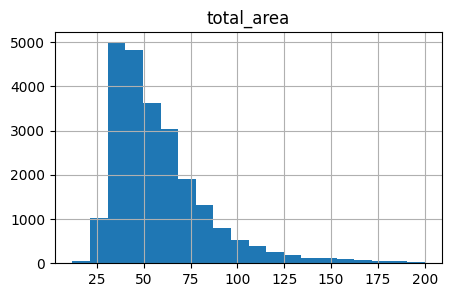

In [67]:
df.query('total_area<200').hist('total_area',bins=20, figsize=(5,3), range=(12,200))
df['total_area'].describe()

2. По гистограмме ниже можно сделать вывод, что кухня больше 20 метров крайне редкое явление, а в основном около 10 метров. 
Если построить график с большим колличеством корзин для наиболее частотных значенийн, очевидно, что размеры кухонь в основном типовые - это выделяющиеся столбцы  
По настоящему большие кухни либо не популярны либо не нужны, их крайне мало в выборке..

array([[<AxesSubplot:title={'center':'kitchen_area'}>]], dtype=object)

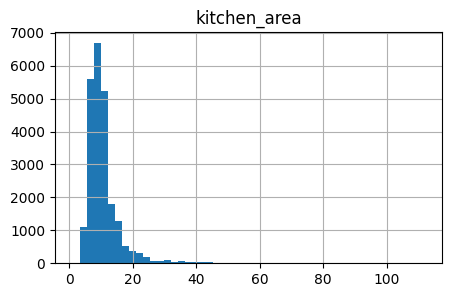

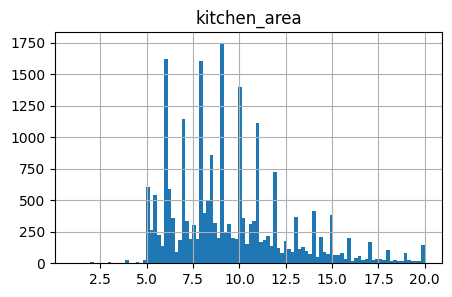

In [68]:
df.hist('kitchen_area',bins=50, figsize=(5,3), range=(1,112))
df.hist('kitchen_area',bins=100, figsize=(5,3), range=(1,20))

In [69]:
df.query('kitchen_area<=1000 and kitchen_area>=1').groupby(df['kitchen_area'].round(-1)).count()[['last_price']]

,last_price
kitchen_area,
0.0,646
10.0,20166
20.0,2275
30.0,309
40.0,181
50.0,37
60.0,20
70.0,3
80.0,3


3. Рассмотрев гистограммы для 'last_price' (общую и там где стоимость меньше миллиона), мы видим выброс. Заменим это значение на медианное для группы с аналогичным метражом (90-120 метров).

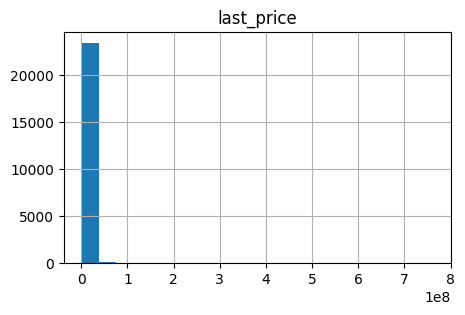

In [70]:
df.hist('last_price',figsize=(5,3),bins=20);

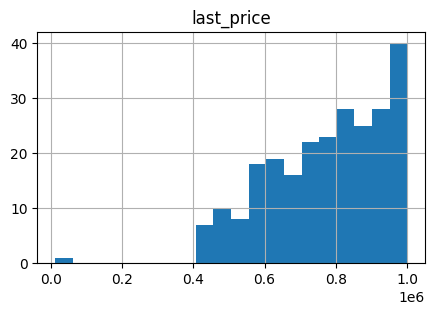

In [71]:
df.query('last_price<=1000000').hist('last_price',figsize=(5,3),bins=20);

In [72]:
df.query('last_price <= 500000').groupby('last_price')['last_price'].count().head()

last_price
12190     1
430000    2
440000    1
450000    4
470000    3
Name: last_price, dtype: int64

In [73]:
df.loc[df['last_price']==12190,'last_price'] = df.query('total_area<=120 and total_area>=90')['last_price'].median()

In [74]:
(df['last_price']/1000000).describe()

count    23646.000000
mean         6.500408
std         10.313608
min          0.430000
25%          3.400000
50%          4.650000
75%          6.790000
max        763.000000
Name: last_price, dtype: float64

На гистограмме в принципе сложно увидеть какое-либо распределение, тк  значения подавляются значениями выше 75% перцентиля.
Для дальнейшего рассмотрея логично было бы разделить на 2 категории квартир "ordinary", "high". 

array([[<AxesSubplot:title={'center':'last_price'}>]], dtype=object)

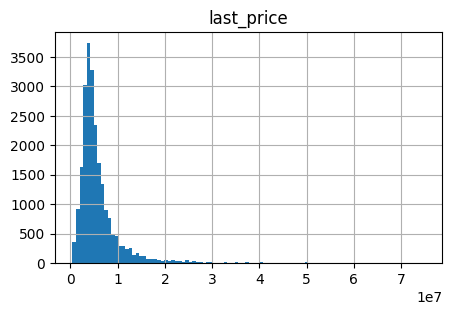

In [75]:
df.query('last_price < 7.6e+07').hist('last_price',figsize=(5,3),bins=100)

In [76]:
df.query('last_price < 7.6e+07')['last_price'].median()

4600000.0

In [77]:
df.query('last_price >= 7.6e+07')['last_price'].median()

118000000.0

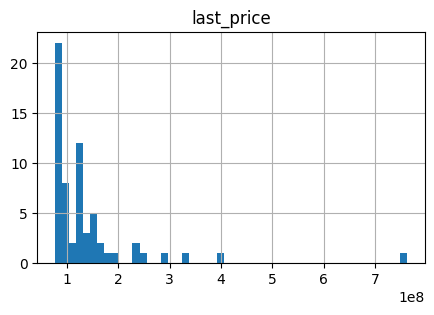

In [78]:
df.query('last_price >= 7.6e+07').hist('last_price',figsize=(5,3),bins=50);

Построим ящик с усами, чтобы рассмотреть аномально высокие значения, которые будут мешать при дальнейшем анализе.  
На графике мы видим, что выделяющиеся значения более 200 млн. встречаются крайне редко. Проверим какую часть они составляют от общих данных и отбросим эти данные, если они сотавляют менее 10% от значального объема данных.

<AxesSubplot:>

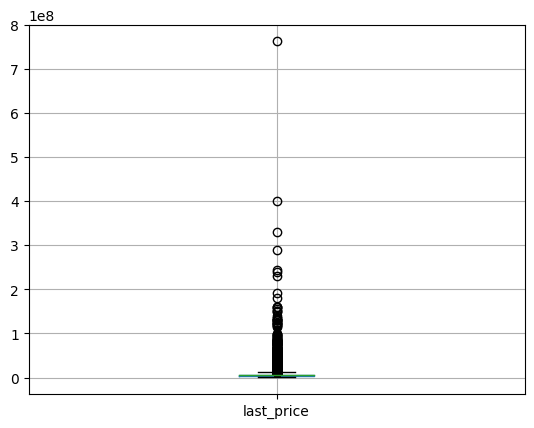

In [79]:
df.boxplot('last_price')

In [80]:
df.query('last_price >= 200000000').shape[0]/df['last_price'].shape[0]

0.0002960331557134399

In [81]:
df=df.query('last_price < 200000000')

4. На гистограмме 'rooms', есть неоднозначные значения равные нулю. Сложно предположить существование квартиры без какой либо комнаты. Вероятнее всего хозяева квартит-студий и квартир со свободной планировкой затруднились выбрать колличество комнат. Проверим эту гипотезу и заменим значения на 1 если она подтвердиться.

array([[<AxesSubplot:title={'center':'rooms'}>]], dtype=object)

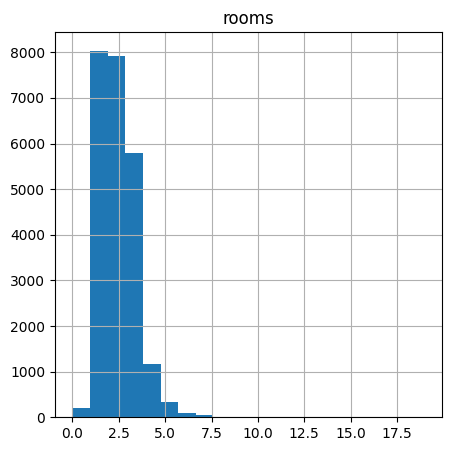

In [82]:
df.hist('rooms',figsize=(5,5),bins=20)

In [83]:
display(len(df.query('rooms <1')))
len(df.query('rooms <1 and (open_plan==True or studio==True)'))

197

197

In [84]:
df['rooms']=df['rooms'].where(df['rooms']!=0,1)
df['rooms'].min()

1

Мы устранили аномальные значения и теперь на гистограмме видно обычное распределение.  
В преобладающем большинстве квартир 1-3 комнаты. Больше всего квартир с 1 комнатой.

array([[<AxesSubplot:title={'center':'rooms'}>]], dtype=object)

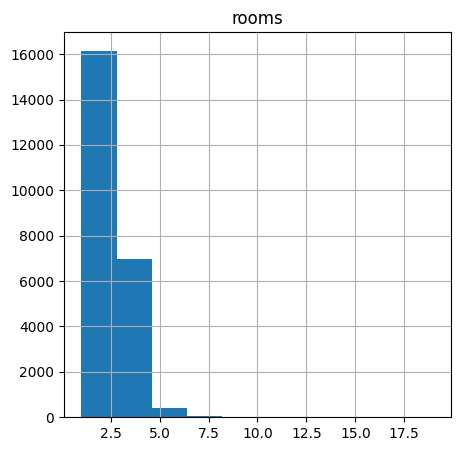

In [85]:
df.hist('rooms',figsize=(5,5),bins=10)

Крайних значений справа на графике так мало, что их не видно. Проверим какую часть составляют крайне редкие значения и удалим из из датафрейма, тк они будут влиять на анализ, но составляют крайне малую его часть(меньше процента).

In [86]:
df['rooms'].value_counts()

1     8233
2     7923
3     5796
4     1175
5      325
6      102
7       55
8       12
9        8
10       3
11       2
14       2
16       1
19       1
15       1
Name: rooms, dtype: int64

In [87]:
df.query('rooms>10').shape[0]/df['rooms'].shape[0]

0.0002961208172934557

In [88]:
df=df.query('rooms<=10')

5. Гистограмма потолков выглядит так буд-то бы потолков более 4 метров почти не бывает, отразим их так же на графике boxplot.
   Анамально малые значения мы устранили на этапе предобработки.

array([[<AxesSubplot:title={'center':'ceiling_height'}>]], dtype=object)

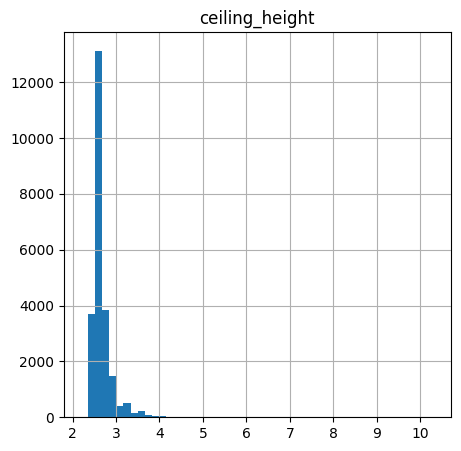

In [89]:
df.hist('ceiling_height',figsize=(5,5),bins=50)

<AxesSubplot:>

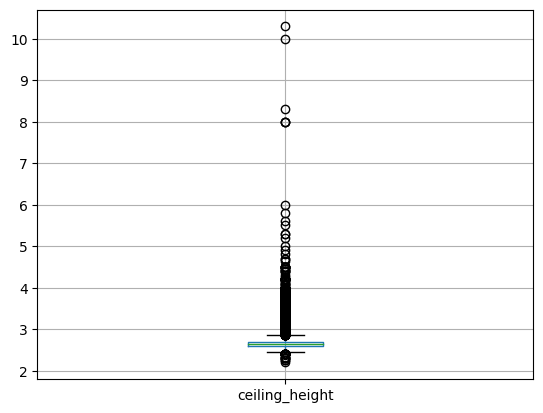

In [90]:
df.boxplot('ceiling_height')

6. Для столбца содержащего категориальные значения построить гистограмму не возможно, отобразим распределение на столбчатой диаграмме.
   В нашей выборке меньше всего квартир на первом этаже, почти так же мало на последнем этаже, больше всего квартир между ними.

<AxesSubplot:xlabel='floor_type'>

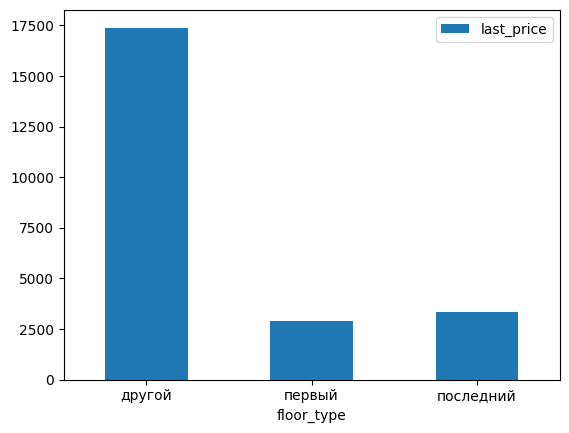

In [91]:
pd.pivot_table(df, index='floor_type', values='last_price',aggfunc='count').plot.bar(rot=0)

7. На гистограмме распределея этажей видим, что большинство квартир продаются в домах со стандартной этажностью: 5-этажные и 9-этажные.

array([[<AxesSubplot:title={'center':'floors_total'}>]], dtype=object)

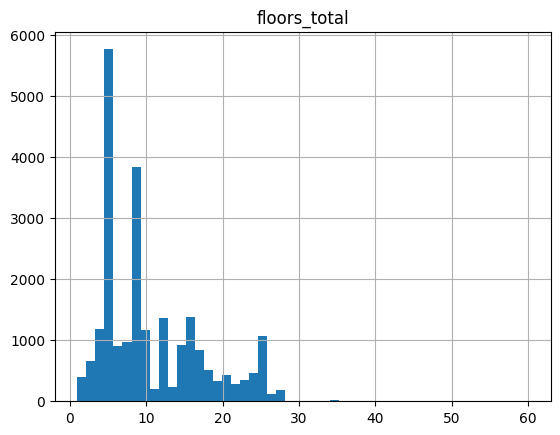

In [92]:
df.hist('floors_total',bins=50)

На диграмме boxplot видно, что в данных есть выбросы с недекватно высокой этажностью.  
Заменим эти значения:этаж 52 вероятнее всего заменил этаж 25 по опечатке, а 60 - 06. 

<AxesSubplot:>

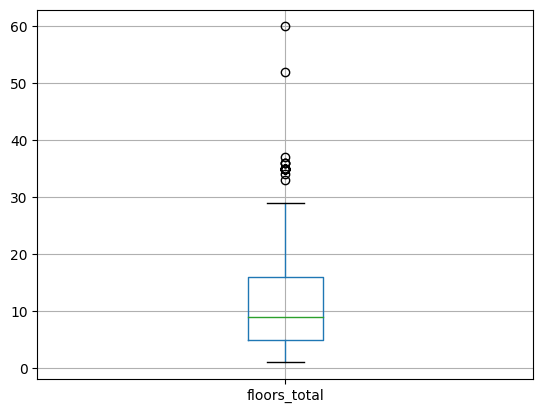

In [93]:
df.boxplot('floors_total')

In [94]:
df.loc[df['floors_total']>50]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,gr_total_area,m_price,weekday,month,year,city_center_km,floor_type
2253,12,3800000.0,45.5,2018-06-28,2,2.88,60,27.4,4,False,False,False,7.4,0,Кронштадт,67763.0,49488,2.0,342.0,3.0,614.0,166,"(40, 50]",83516.48,3,6,2018,49,другой
16731,9,3978000.0,40.0,2018-09-24,1,2.65,52,10.5,18,False,False,False,14.0,0,Санкт-Петербург,20728.0,12978,1.0,793.0,0.0,NaN,45,"(30, 40]",99450.00,0,9,2018,13,другой


In [95]:
df.loc[df['floors_total']==60,'floors_total'] = 6
df.loc[df['floors_total']==52,'floors_total'] = 25
df.loc[df['floors_total']>50]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,gr_total_area,m_price,weekday,month,year,city_center_km,floor_type


8. На гистограмме ниже мы видим, что большинство продаваевых квартир находятся на расстоянии до 30-35 км от города.
   Выбросы не наблюдаются.

array([[<AxesSubplot:title={'center':'city_center_km'}>]], dtype=object)

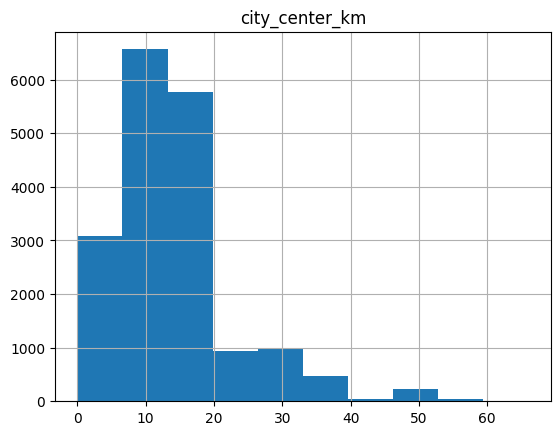

In [96]:
df.hist('city_center_km')

9. На гистограмме ниже мы видим, что большинство квартир находятся в относительной близости от парка - менее 1 км. Больше всего квартир продаётся в 500 метрах от парка.
    Выбросы не наблюдаются.

array([[<AxesSubplot:title={'center':'parks_nearest'}>]], dtype=object)

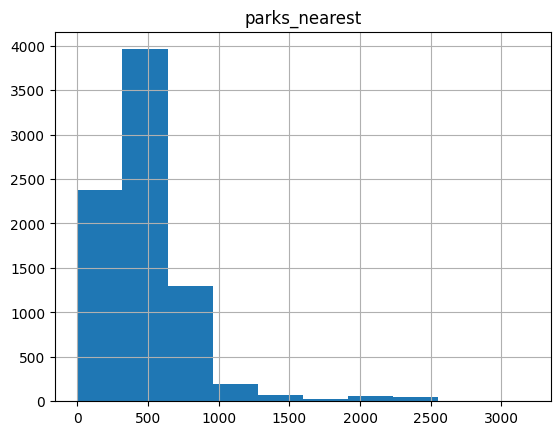

In [97]:
df.hist('parks_nearest',bins=10)

###  Как быстро продавались квартиры (столбец days_exposition)

In [98]:
df['days_exposition'].describe()

count    20456.000000
mean       180.671930
std        219.630595
min          1.000000
25%         45.000000
50%         95.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64

Медианное время прожаи квартиры более точно описывает как быстро продаются квартиры в целом -  95 дней.   
На среднее время, 180 дней, влияют необычно долгие продажи, такие как 1000 и более дней.  
Как мы видим на гистограмме большинство квартир продаются до 200 дней.
Продажи более 600 дней можно считать необычно долгими - на гистограмме они совсем близко к оси.
Быстрыми продажами можно считать все, что меньше 25 процентиля, т.е. меньше 45 дней.

<AxesSubplot:>

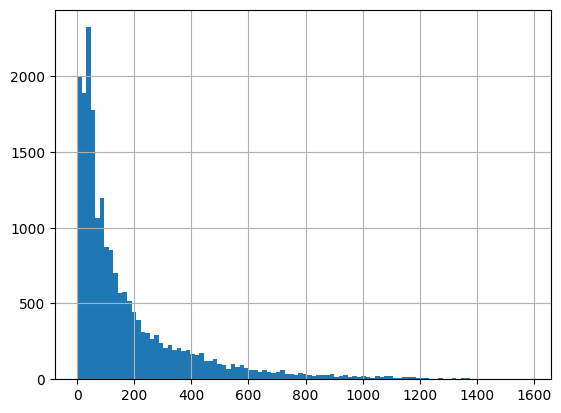

In [99]:
df['days_exposition'].hist(bins=100)

### Факторы, которые больше всего влияют на общую (полную) стоимость объекта.

#### Общая площадь

Для наглядного представления зависимости стоимости от общей площади рассмотрим точечную диаграмму.  
Если рассматривать все квартиры одновременно, и дешевые и дорогие, то не видно четкой взаимосвязи между метрами и ценой, но на эту картину влияют экстремально дорогие квартиры.   
Рассмотрим две категороии по отдельности и увидим, что для "обычных" квартир (стоимость до 76000000) точечная диаграмма стремится вправый верхний угол от 0 до 3, далее такой четкой взимосвязи мы уже не видим, но все же влияние очевидно. 
Для "дорогих" квартир, напротив - взаимосвязи между метрами и стоимостью не наблюдается.
Так же мы видим, что коэффециэнт корреляции для обычных квартир сильно больше чем для дорогих.

In [100]:
df['total_area'].corr(df['last_price'])

0.7337645994887887

<AxesSubplot:xlabel='last_price', ylabel='total_area'>

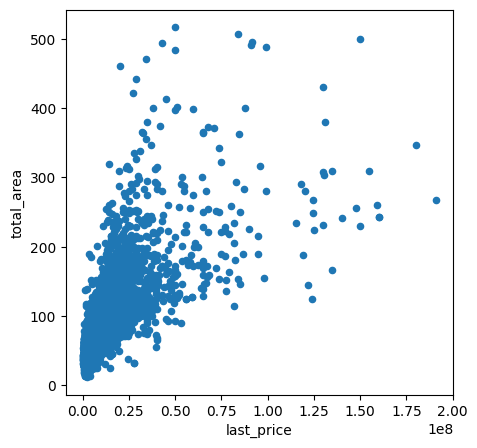

In [101]:
df.plot.scatter(x='last_price', y='total_area',figsize=(5,5))

In [102]:
df_ord=df.query('last_price < 7.6e+07')
df_high=df.query('last_price >= 7.6e+07')

In [103]:
df_ord['total_area'].corr(df_ord['last_price'])

0.7742359349815309

<AxesSubplot:xlabel='last_price', ylabel='total_area'>

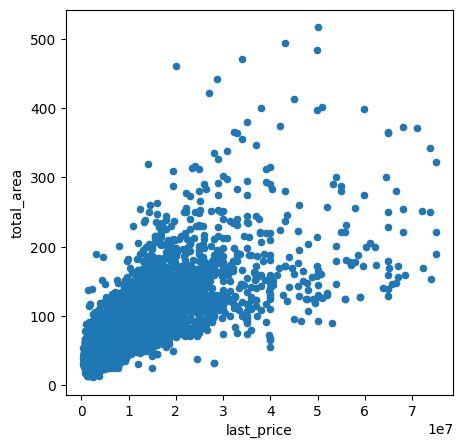

In [104]:
df_ord.plot.scatter(x='last_price', y='total_area',figsize=(5,5))

In [105]:
df_high['total_area'].corr(df_high['last_price'])

0.1641670476601033

<AxesSubplot:xlabel='last_price', ylabel='total_area'>

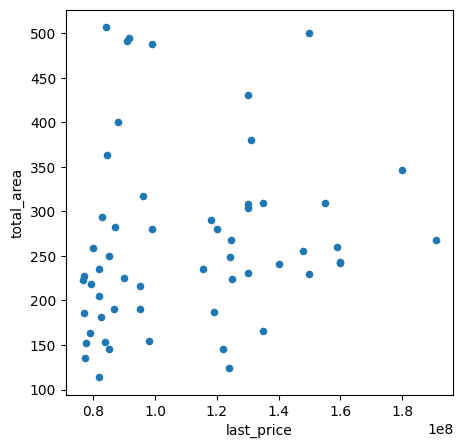

In [106]:
df_high.plot.scatter(x='last_price', y='total_area',figsize=(5,5))

#### Жилая площадь

Логично что у квартир подороже жилая площадь будет больше, но данных различий нехватает, тенденция особенно хорошо просматривается до 100 метров жилой площади.

<AxesSubplot:xlabel='last_price', ylabel='living_area'>

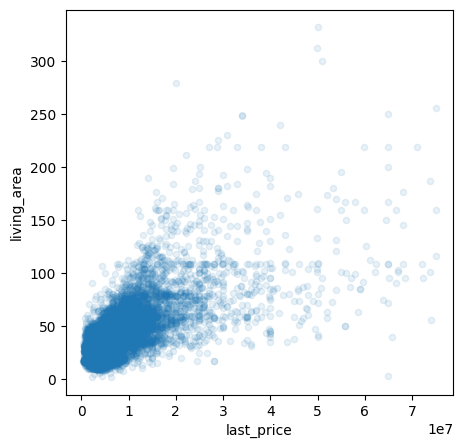

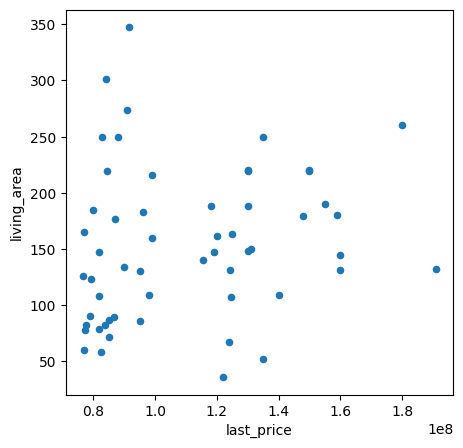

In [107]:
df_ord.plot.scatter(x='last_price', y='living_area',figsize=(5,5),alpha=0.1)
df_high.plot.scatter(x='last_price', y='living_area',figsize=(5,5))

#### Площадь кухни

Однако аналогичной ситуации с площадью кухонь не наблюдается, на графике не прослеживается четкая засисмость.

<AxesSubplot:xlabel='last_price', ylabel='kitchen_area'>

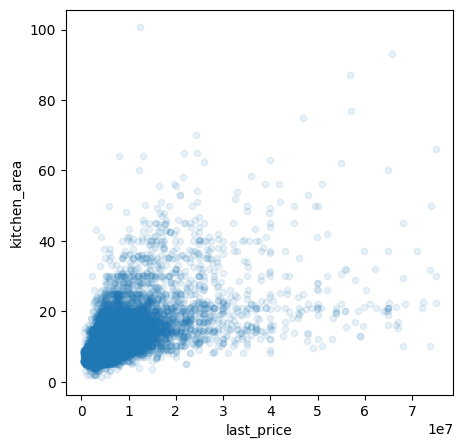

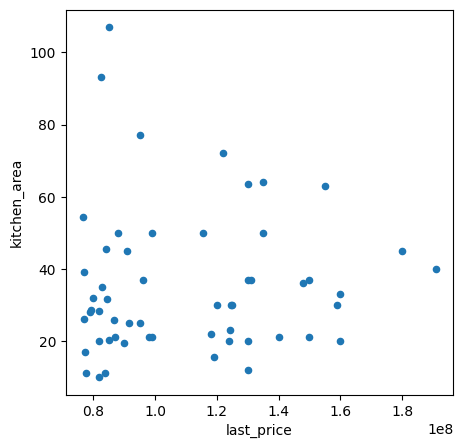

In [108]:
df_ord.plot.scatter(x='last_price', y='kitchen_area',figsize=(5,5),alpha=0.1)
df_high.plot.scatter(x='last_price', y='kitchen_area',figsize=(5,5))

#### Количество комнат

Для дорогих и обычных квартир коэффициент корреляции значительно отличается. Для дорогих связь между колличеством комнат и стоимостью не сильная.
Для обычных напротив связь есть и её можно визуализировать: на графике агрегированных данных мы видим, что чем больше комнат тем дороже стоимость квартир.

In [109]:
df['rooms'].corr(df['last_price'])

0.43513707696057863

In [110]:
df_ord['rooms'].corr(df_ord['last_price'])

0.48837863990418096

In [111]:
df_high['rooms'].corr(df_high['last_price'])

0.17194226312955244

<AxesSubplot:xlabel='rooms'>

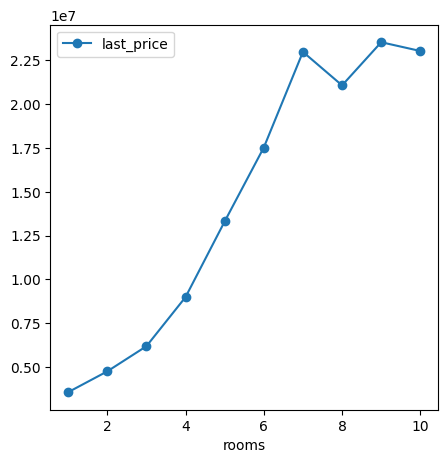

In [112]:
pt_rooms_ord=pd.pivot_table(df_ord,values='last_price', index='rooms',aggfunc='median').reset_index()
pt_rooms_ord.plot(y='last_price', x='rooms',figsize=(5,5),style='o-')

<AxesSubplot:xlabel='rooms'>

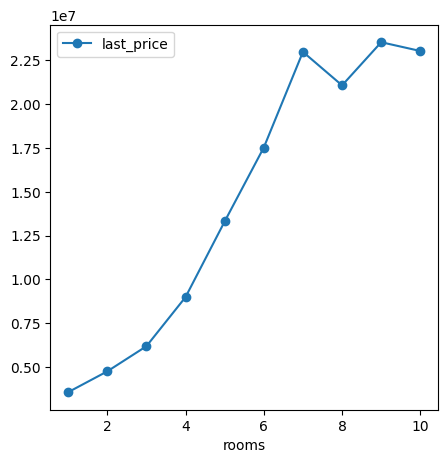

In [113]:
pt_rooms_ord=pd.pivot_table(df_ord,values='last_price', index='rooms',aggfunc='median').reset_index()
pt_rooms_ord.plot(y='last_price', x='rooms',figsize=(5,5),style='o-')

#### Тип этажа

Квартиры расположенные не на первом и не на последнем этаже в среднем продаются дороже. Так же таких квартир значительно больше.  
Если сравнивать первый и последние этажи, то цена на последний будет выше, чем на первый.
На графике мы так же видим, что наиболее дорогие квартиры встречаются чаще на последнем этаже.

In [114]:
pd.pivot_table(df,index='floor_type',values='last_price',aggfunc={'median','count'}).reset_index()

,floor_type,count,median
0,другой,17395,4847000.0
1,первый,2912,3900000.0
2,последний,3325,4300000.0


<AxesSubplot:xlabel='floor_type', ylabel='last_price'>

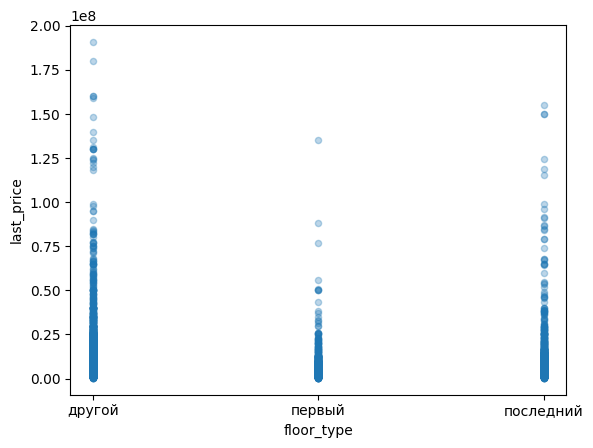

In [115]:
df.plot.scatter(y='last_price', x='floor_type',alpha=0.3)

#### Даты размещения (день недели, месяц, год)

На диаграмме мы видим, что нет определенного дня недели в который не продавались бы квартиры вообще, квартиры с наибольшей стоимостью продаются во вторник, с наименьшей в воскресенье.

<AxesSubplot:xlabel='weekday'>

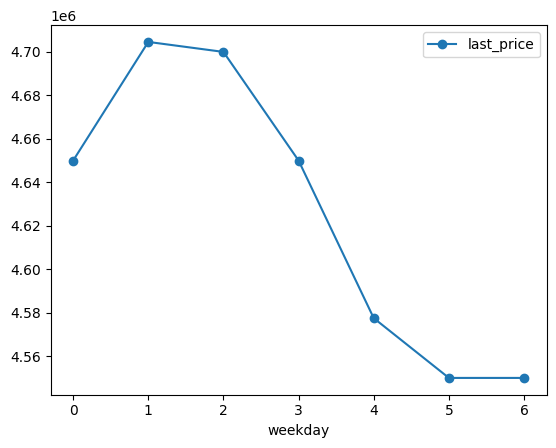

In [116]:
pd.pivot_table(df,values='last_price',index='weekday',aggfunc='median').reset_index().plot(y='last_price', x='weekday',style='o-')

На диаграмме с рапределением по месяцам мы видим, что с наименьшей стоимостью квартиры продаются в июне, с наибольшей в апреле.

<AxesSubplot:xlabel='month'>

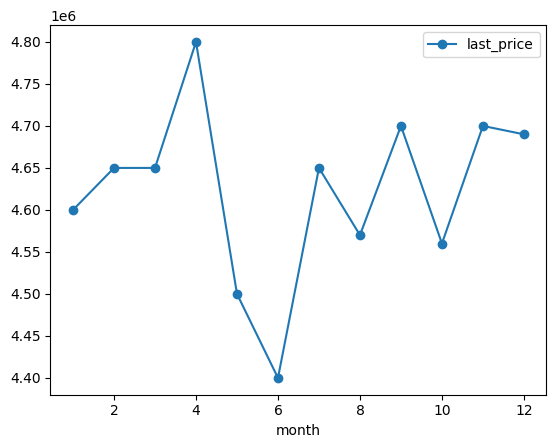

In [117]:
pd.pivot_table(df,values='last_price',index='month',aggfunc='median').reset_index().plot(y='last_price', x='month',style='o-')

На графике ниже видим, что смоимость квартир значительно снизилась в 2016-2017 годах, после наблюдается небольшой подъем.

<AxesSubplot:xlabel='year'>

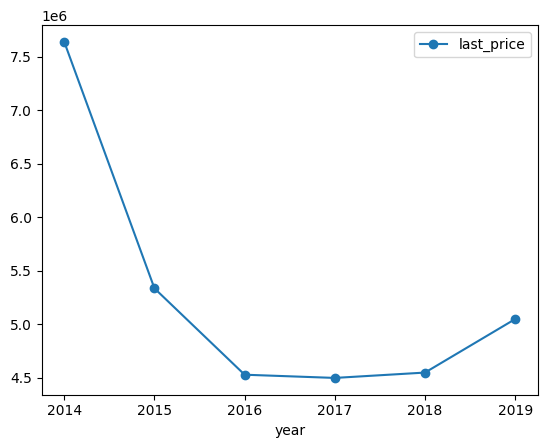

In [118]:
pd.pivot_table(df,values='last_price',index='year',aggfunc='median').reset_index().plot(y='last_price', x='year',style='o-')

### Вывод 4

Коэффециэнт корреляции для обычных квартир (стоимость до 76000000) сильно больше, чем для дорогих. Для обычных квартир наблюдается четкая взаимосвязь между общей площадью и стоимостью, для дорогих квартир такой связи почти нет. Связь между жилой площадью так же различается между дорогими и обычными квартирами, наболее она характерна для жилой площади до 100 метров.Корреляции между площадью кухонь и стомостью не наблюдается.
Для дорогих связь между колличеством комнат и стоимостью не сильная. Для обычных напротив - чем больше комнат, тем дороже стоимость квартир.
Если сравнивать первый и последние этажи, то цена на последний будет выше, чем на первый. Квартиры расположенные на "другом" этаже в среднем продаются дороже первых двух категорий.
Квартиры с наибольшей стоимостью продаются во вторник, с наименьшей - в субботу и воскресенье.
Квартиры с наибольшей стоимостью продаются в апреле, с наименьшей - в июне.
Смоимость квартир значительно снижалась в 2016-2017 годах, после наблюдается постепенный подъем..

## Цены для населённых пунктов

Ниже представлены 10 населённых пунктов с наибольшим количеством объявлений о продаже квартир.   
Среди них наибольшая цена за квадратный метр в Санкт-Петербурге, а наименьшая в Выборге.

In [119]:
pivot_10_city=pd.pivot_table(df,index='locality_name',values='m_price',aggfunc={'count','median'}).reset_index().sort_values('count').tail(10)
pivot_10_city.sort_values('median',ascending=False)

,locality_name,count,median
33,Санкт-Петербург,15703,104761.900
32,Пушкин,369,100000.000
79,деревня Кудрово,299,91860.470
230,поселок Парголово,327,91642.860
219,поселок Мурино,556,85878.465
295,поселок Шушары,440,76876.175
13,Колпино,338,74723.745
6,Гатчина,307,67796.610
3,Всеволожск,398,65789.470
4,Выборг,237,58158.320


## Зависимость цены от удалённости от центра для Cанкт-Петербурга

Стоимость квадратного метро в центре СПб значительно выше стоимости на окраине.  
Общая тенценция: чем ближе к центру тем дороже. Однако мы можем видеть провал возле 3 км и подъем около 6 км - это может объясняться разной престижностью районов города или наличием инфраструктуры. После  10 км от центра график стабильно идёт вниз с постепенным уменьшением стомости за квадратный метр. Одако мы так же наблюдаем еще несколько небольших подъемов в конце графика (вероятнее всего это престижные низкоэтажные окраины). И особенно сильный в районе 27 км - примерно на таком расстоянии расположен Пушкин (второй населённый пункт из таблицы выше). 

<AxesSubplot:xlabel='city_center_km'>

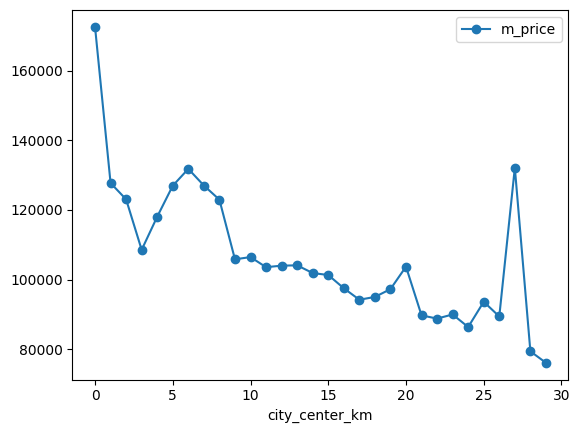

In [120]:
df_spb=df.query('locality_name=="Санкт-Петербург"')
t_km_price=pd.pivot_table(df_spb, index='city_center_km', values='m_price',aggfunc='median').reset_index()
t_km_price.plot(x='city_center_km', y='m_price',style='o-' )

# Общий вывод

При первоначальном знакомстве с данными, мы определили, в каких столбцах есть пропуски и заполнили их, где было возможно. А так же преобразовали типы данных в нескольких столбцах, где это допустимо. Были изучены уникальные значения в столбце с наименованием населённого пункта и устранены неявные дубликаты. По ходу исследования мы встречали некоторые аномалии и устраняли их, целью исследования не являлось выявление аномалий и составление баг репорта, но материала для него достаточно  

На наш взгляд наиболее значимыми для анализа являются данные о физических характеристиках квартир. В соответствующих столбцах мы исключили пропуски. Мы приняли решение максимально сохранять данные, чтобы из-за пропусков в менее значимых полях не потерять большое количество данных, поэтому у нас сохранились пропуски в столбцах с геоданными.  

Мы создали новые столбцы с параметрами:
цена одного квадратного метра,день недели публикации объявления (0 — понедельник, 1 — вторник),	месяц публикации объявления, год публикации объявления, расстояние до центра города в километрах, тип этажа квартиры (значения — «‎первый», «последний», «другой»).

В ходе исследования мы выяснили типичные характеристики в выборке:  
- площадь меньше 100 метров (квартиры более 200 метров уже исчисляются в сотнях и меньше)
- кухня меньше или около 10 метров.
- количество комнат от 1 до 3, наиболее вероятна 1 комната
- высота потолков 2,65, потолки выше 5 метров - редкость
- большинство квартир продаются в домах со стандартной этажностью: 5-этажные и 9-этажные.
- большинство продаваемых квартир находятся на расстоянии до 30-35 км от города
- большинство квартир находятся в относительной близости от парка - менее 1 км, больше всего квартир продаётся в 500 метрах от парка.

# Результат исследования 

Относительно цены все квартиры можно разделить на обычные и дорогие, соответственно средняя стоимость: 4600000 и 118000000 - дорогие. Рассматривать все квартиры вместе невозможно тк крайние значения сильно подавляют среднее.  

В среднем квартира продается за 95 дня. Большинство квартир продаются до 200 дней, продажи более 600 дней можно считать необычно долгими, быстрыми продажами можно считать - меньше 45 дней.   й.

Стоимость квартиры сильнее всего зависит от общей площади и жилой площади, почти не зависит от площади кухни.
Для обычных квартир наблюдается четкая взаимосвязь между общей площадью и стоимостью, для дорогих квартир такой связи почти нет. Связь между жилой площадью так же различается между дорогими и обычными квартирами, наиболее она характерна для жилой площади до 100 метров. Для дорогих связь между количеством комнат и стоимостью не сильная. Для обычных напротив - чем больше комнат, тем дороже стоимость квартир.   

Если сравнивать первый и последние этажи, то цена на последний будет выше, чем на первый. Квартиры расположенные на "другом" этаже в среднем продаются дороже первых двух категорий.   

Квартиры с наибольшей стоимостью продаются во вторник, с наименьшей - в выходные. Квартиры с наибольшей стоимостью продаются в апреле, с наименьшей - в июне. Стоит заметить, что стоимость квартир значительно снижалась в 2016-2017 годах, после наблюдался постепенный подъем.

В исследовании  представлены 10 населённых пунктов с наибольшим количеством объявлений о продаже квартир. Наибольшая цена за квадратный метр в Санкт-Петербурге, а наименьшая в Выборге. 

Так же представлен график зависимости цены от удалённости от центра (для локации "Санкт-Петербург"). Стоимость квадратного метра в центре СПб значительно выше стоимости на окраине. Общая тенденция: чем ближе к центру тем дороже, но наблюдаются выбросы скорее всего связанные с престижностью районов. После 10 км от центра постепенно уменьшается стоимости за квадратный метр. Однако мы можем так же наблюдать значительный подъем стоимости районе 27 км - примерно на таком расстоянии расположены исторические пригороды и малоэтажные современные постройки.

# Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Файл с данными открыт.
- [x]  Файл с данными изучен: выведены первые строки, использован метод `info()`, построены гистограммы.
- [x]  Найдены пропущенные значения.
- [x]  Пропущенные значения заполнены там, где это возможно.
- [x]  Объяснено, какие пропущенные значения обнаружены.
- [x]  В каждом столбце установлен корректный тип данных.
- [x]  Объяснено, в каких столбцах изменён тип данных и почему.
- [x]  Устранены неявные дубликаты в названиях населённых пунктов.
- [x]  Обработаны редкие и выбивающиеся значения (аномалии).
- [x]  В таблицу добавлены новые параметры:
       – цена одного квадратного метра;
       – день публикации объявления (0 - понедельник, 1 - вторник и т. д.);
       – месяц публикации объявления;
       – год публикации объявления;
       – тип этажа квартиры (значения — «первый», «последний», «другой»);
       – расстояние до центра города в километрах.
- [x]  Изучены и описаны параметры:
        - общая площадь;
        - жилая площадь;
        - площадь кухни;
        - цена объекта;
        - количество комнат;
        - высота потолков;
        - тип этажа квартиры («первый», «последний», «другой»);
        - общее количество этажей в доме;
        - расстояние до центра города в метрах;
        - расстояние до ближайшего парка.
- [x]  Выполнено задание «Изучите, как быстро продавались квартиры (столбец `days_exposition`)»:
    - построена гистограмма;
    - рассчитаны среднее и медиана;
    - описано, сколько обычно занимает продажа и указано, какие продажи можно считать быстрыми, а какие — необычно долгими.
- [x]  Выполнено задание «Определите факторы, которые больше всего влияют на общую (полную) стоимость объекта». Построены графики, которые показывают зависимость цены от параметров:
        - общая площадь;
        - жилая площадь;
        - площадь кухни;
        - количество комнат;
        - тип этажа, на котором расположена квартира (первый, последний, другой);
        - дата размещения (день недели, месяц, год).
- [x]  Выполнено задание «Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений»:
    - выделены населённые пункты с самой высокой и низкой стоимостью квадратного метра.
- [x]  Выполнено задание «Выделите квартиры в Санкт-Петербурге с помощью столбца `locality_name` и вычислите их среднюю стоимость на разном удалении от центра»:
    -  учтён каждый километр расстояния, известны средние цены квартир в одном километре от центра, в двух и так далее;
    -  описано, как стоимость объекта зависит от расстояния до центра города;
    -  построен график изменения средней цены для каждого километра от центра Петербурга.
- [x]  На каждом этапе сделаны промежуточные выводы.
- [x]  В конце проекта сделан общий вывод.